# Classificação com Random Forest em R

In [15]:
# bibliotecas
#install.packages('randomForest')
library("randomForest")

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



In [3]:
# carregando dados
dados <- read.csv('/content/Credit.csv')
head(dados)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,⋯,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good


In [4]:
str(dados)

'data.frame':	1000 obs. of  21 variables:
 $ checking_status       : chr  "<0" "0<=X<200" "'no checking'" "<0" ...
 $ duration              : int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history        : chr  "'critical/other existing credit'" "'existing paid'" "'critical/other existing credit'" "'existing paid'" ...
 $ purpose               : chr  "radio/tv" "radio/tv" "education" "furniture/equipment" ...
 $ credit_amount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_status        : chr  "'no known savings'" "<100" "<100" "<100" ...
 $ employment            : chr  ">=7" "1<=X<4" "4<=X<7" "4<=X<7" ...
 $ installment_commitment: int  4 2 2 2 3 2 3 2 2 4 ...
 $ personal_status       : chr  "'male single'" "'female div/dep/mar'" "'male single'" "'male single'" ...
 $ other_parties         : chr  "none" "none" "none" "guarantor" ...
 $ residence_since       : int  4 2 3 4 4 4 4 2 4 2 ...
 $ property_magnitude    : chr  "'real estate'" "'real estate'" "

In [5]:
# transformando a variavel class em fator
dados$class <- as.factor(dados$class)
str(dados$class)

 Factor w/ 2 levels "bad","good": 2 1 2 2 1 2 2 2 2 1 ...


In [10]:
# separando base de treino e teste
set.seed(123)
amostra <- sample(2, 1000, replace = T, prob = c(0.7,0.3))
X_train <- dados[amostra == 1,]
X_test <- dados[amostra ==2, ]

dim(X_train)
dim(X_test)

[1] 705  21

[1] 295  21

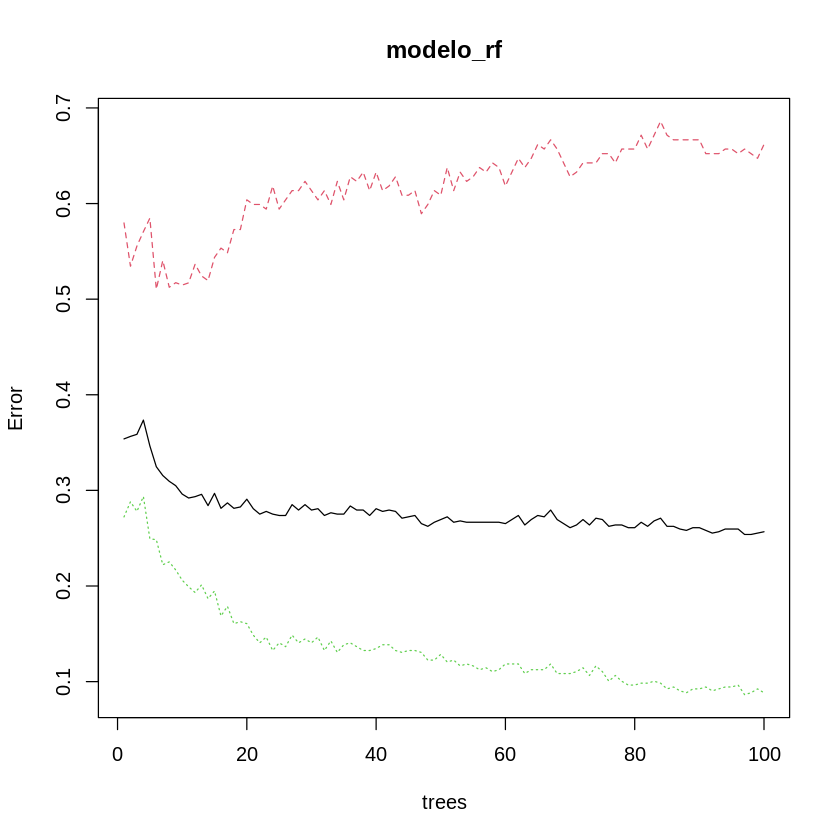

In [16]:
# modelo random forest
modelo_rf <- randomForest(class ~ ., data=X_train, ntree=100, importance=T)
plot(modelo_rf)

In [18]:
# previsoes e avaliacao do modelo
y_pred <- predict(modelo_rf, X_test)

matriz_confusao <- table(y_pred, X_test$class)
matriz_confusao

acuracia <- (matriz_confusao[1] + matriz_confusao[4]) / sum(matriz_confusao)
acuracia

      
y_pred bad good
  bad   34   14
  good  59  188

[1] 0.7525424